In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv("dataset/top_insta_influencers_data.csv")
dataset.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [3]:
dataset.isnull().sum()

rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [6]:
data = dataset['country'].mode()[0]
data

'United States'

In [7]:
# Replaced the Nan values with most frequent values from the column
dataset['country'].fillna('United States', inplace=True)


/tmp/ipykernel_15857/3536913323.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['country'].fillna('United States', inplace=True)


In [8]:
dataset.isnull().sum()

rank                 0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
country              0
dtype: int64

In [9]:
# Removed the 'rank' column as it is of no use because our target variable is 'influence_score'

dataset.drop(['rank', 'channel_info'], axis=1, inplace=True)
dataset.head()

,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,United States
3,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [11]:
# Function to convert string values to numbers
def convert_to_number(value):
    if isinstance(value, str):
        if 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif '%' in value:
            return float(value.replace('%', ''))
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        elif 'k' in value:
            return float(value.replace('k', '')) * 1e3
    return float(value) if value else np.nan

In [12]:
# Convert necessary columns
cols_to_convert = ["posts", 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
dataset[cols_to_convert] = dataset[cols_to_convert].applymap(convert_to_number)

dataset.head()

/tmp/ipykernel_15857/3434921843.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset[cols_to_convert] = dataset[cols_to_convert].applymap(convert_to_number)


,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
2,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09,United States
3,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States


In [16]:
# Replace the NaN value with the mean value of the column 
dataset['60_day_eng_rate'].fillna(dataset['60_day_eng_rate'].mean(), inplace=True)


/tmp/ipykernel_15857/3012404629.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['60_day_eng_rate'].fillna(dataset['60_day_eng_rate'].mean(), inplace=True)


In [14]:
# Removing the 'country' column as there is no significant relationship with the target variable
dataset.drop('country', axis=1, inplace=True)
dataset.head()

,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
0,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10
1,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10
2,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09
3,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10
4,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10


##### Divide into target variable and predictors

In [18]:
y = dataset['influence_score']  # Target variable
X = dataset.drop(['influence_score'], axis=1) # Predictors

##### Normalize the data

In [19]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled

array([[-0.05764137,  5.4200709 ,  3.15964844, -0.15454441,  2.85480526,
         4.56773842],
       [ 0.98068208,  3.92897166,  2.97682213, -0.08512152,  2.53112309,
         9.68668512],
       [-0.75274124,  3.80788788,  2.29122345, -0.1998202 ,  1.72191767,
         0.42211258],
       ...,
       [-0.78735202, -0.60146671, -0.72847304, -0.49562205, -0.60719134,
        -0.63246254],
       [-0.34606455, -0.6041877 , -0.48791932, -0.14548925, -0.39944133,
        -0.35293921],
       [ 0.20193949, -0.60690868, -0.71069318, -0.4835485 , -0.59920718,
        -0.48467999]])

##### Split the data

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


##### Train the model

In [22]:
from sklearn.linear_model import LinearRegression

# Training the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
# Coefficients of the linear model
cdf = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print("Coefficients: \n", cdf)

Coefficients: 
                    Coefficient
posts                 0.637507
followers             4.308984
avg_likes            -0.656737
60_day_eng_rate       2.624998
new_post_avg_like    -2.617120
total_likes           0.052962


##### Looking at the coefficients, 'followers' feature make a huge impact on target variable

In [24]:
predictions = lr.predict(X_test)


In [25]:
predictions

array([82.5412541 , 87.31567321, 85.70430015, 80.88227472, 80.42002555,
       80.77444475, 79.36817036, 81.6700349 , 79.89369587, 80.9200458 ,
       81.23503985, 80.51664264, 81.49863286, 80.81459676, 78.84598806,
       80.73569034, 79.8632204 , 80.38094635, 82.70886197, 83.03083943,
       80.64578547, 89.21057008, 79.76223968, 80.58914592, 82.5357015 ,
       81.2922926 , 81.25196914, 81.41857979, 80.74634641, 80.67372178,
       91.90108212, 87.3087833 , 81.16029686, 79.72521342, 80.9015525 ,
       79.70009864, 80.72841536, 80.44191318, 80.74266969, 81.1518377 ])

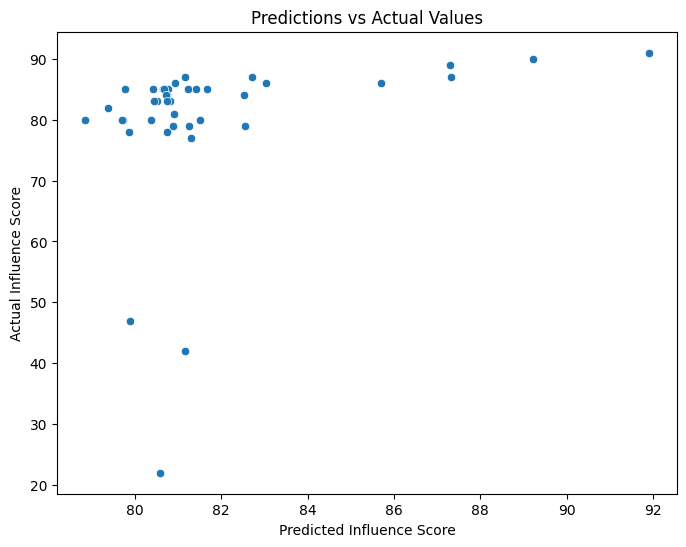

In [26]:
# Plotting the predictions vs actual values
plt.figure(figsize=(8,6))
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predicted Influence Score")
plt.ylabel("Actual Influence Score")
plt.title("Predictions vs Actual Values")
plt.show()

In [ ]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of our LM Model")

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)


print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)

Mean Absolute Error (MAE):  5.664670936196304
Mean Squared Error (MSE):  159.71440721056507
Root Mean Squared Error (RMSE):  12.637816552338663


In [28]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


R-squared: 0.055332124989726394
